In [1]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

In [2]:
%%time

with open('cenario-2/cenario2_8M2020_tweets_pt.txt', 'r') as file:
    tweets = file.readlines()

CPU times: user 4.23 ms, sys: 4.01 ms, total: 8.24 ms
Wall time: 7.59 ms


In [3]:
tweets[0]

'sol cara projeto inclusive praia volta proximo domingo programacao especial referencia dia internacional mulher vai ter jogos brincadeiras diversao show isabelle passinho perca\n'

# Worldcloud

In [4]:
palavras = ','.join(list(tweets))

In [5]:
%%time

# Generate a word cloud image
wordcloud = WordCloud().generate(palavras)

CPU times: user 2.75 s, sys: 80 ms, total: 2.83 s
Wall time: 2.83 s


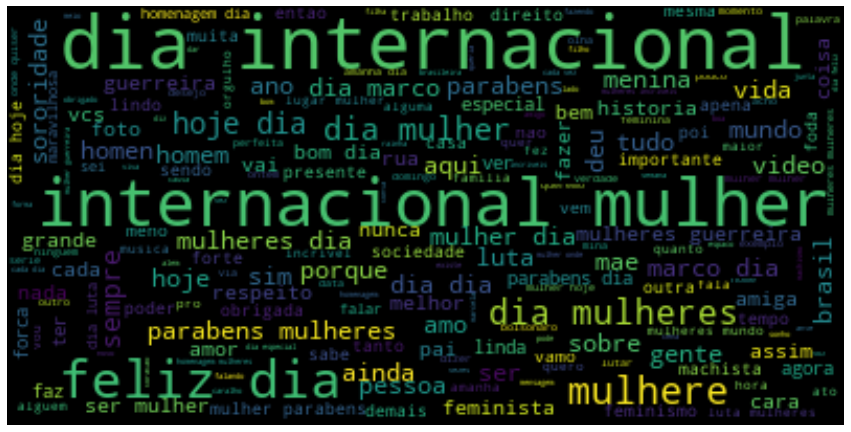

In [6]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (15,15))
plt.axis("off")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size = 40).generate(palavras)
plt.figure(figsize = (15,15))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

# Topic Modeling

### LDA

In [ ]:
n_features = 10000
n_components = 10
n_top_word = 10

In [ ]:
data_samples = tweets
n_samples = len(data_samples)

In [ ]:
with open('cenario-2/portuguese.txt', 'r') as file:
    stopwords = [f.replace('\n','') for f in file.readlines()]
    
stopwords

In [ ]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")

tf_vectorizer = CountVectorizer(max_df = 0.90, 
                                min_df =20,
                                max_features = n_features,
                                stop_words = stopwords)

tf = tf_vectorizer.fit_transform(data_samples)

print("tf features for LDA extraction is completed!")

In [ ]:
%%time

print("Fitting LDA models with tf features\n" 
      "n_samples = %d and n_features = %d..." % (n_samples, n_features))

lda = LatentDirichletAllocation(n_components = n_components, 
                                max_iter = 5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda.fit(tf)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
type(tf)

In [ ]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer. get_feature_names()
print_top_words(lda, tf_feature_names, n_top_word)

### LSA

In [ ]:
print("Fiting LSA model")
lsa = TruncatedSVD(n_components=n_components, n_iter=40, tol=0.01)
lsa.fit(tf)

In [ ]:
print("\nTopics in LSA model:")
print_top_words(lsa, tf_feature_names, n_top_word)